### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import warnings

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
for col in application_df.columns:
    print(col)

EIN
NAME
APPLICATION_TYPE
AFFILIATION
CLASSIFICATION
USE_CASE
ORGANIZATION
STATUS
INCOME_AMT
SPECIAL_CONSIDERATIONS
ASK_AMT
IS_SUCCESSFUL


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME', SPECIAL_CONSIDERATION, STATUS.
application_df.drop(['EIN', 'SPECIAL_CONSIDERATIONS', 'STATUS'], axis = 1, inplace = True)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [5]:
# Determine the number of unique values in each column.
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [6]:
application_df[application_cat].nunique()

NAME                19568
APPLICATION_TYPE       17
AFFILIATION             6
CLASSIFICATION         71
USE_CASE                5
ORGANIZATION            4
INCOME_AMT              9
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
name_counts = application_df.NAME.value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

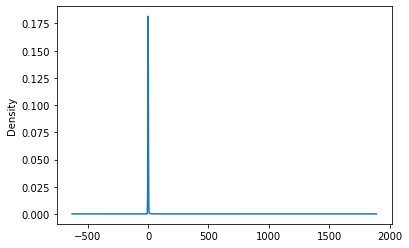

In [8]:
name_counts.plot.density()

In [9]:
replace_name = list(name_counts[name_counts < 100].index)
replace_name 

['AIR FORCE ASSOCIATION',
 'WORKERS UNITED',
 'GAMMA THETA UPSILON',
 'INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS',
 'SOCIETY OF SAINT VINCENT DE PAUL COUNCIL OF LOS ANGELES',
 'ROTARY INTERNATIONAL',
 'CALIFORNIA GARDEN CLUBS INC',
 'SWEET ADELINES INTERNATIONAL',
 'DISABLED AMERICAN VETERANS',
 'KLEIN SUPPORT GROUPS INC',
 'CLEARCREEK I S D SUPPORT GROUPS',
 'VFW AUXILIARY DEPARTMENT OF OKLAHOMA INC',
 'DEPARTMENT OF KANSAS LADIES AUXILIARY TO THE VFW OF THE US INC',
 'CISD EDUCATIONAL SUPPORT GROUPS INC',
 'SONS OF CONFEDERATE VETERANS INC',
 'SLOW FOOD USA INC',
 'NATIONAL YOUNG MENS SERVICE LEAGUE',
 'AMATEUR ATHLETIC UNION OF THE UNITED STATES',
 'LAMBDA THETA ALPHA',
 'UNITED FEDERATION OF DOLL CLUBS INC',
 'UNIVERSITY OF FLORIDA',
 'AMERICAN YOUTH FOOTBALL INC',
 'AMERICAN ASSOCIATION OF UNIVERSITY WOMEN INC',
 'MUSIC TEACHERS NATIONAL ASSOCIATION INC',
 'INTERNATIONAL MOUNTAIN BICYCLING ASSOCIATION - COLORADO',
 'MARINE CORPS LEAGUE',
 'CLEAR CREEK ISD GROUPS',
 'DEPARTMENT OF

In [10]:
# Replace in dataframe
for name in replace_name:
  application_df.NAME= application_df.NAME.replace(name, "Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                                 25987
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [11]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

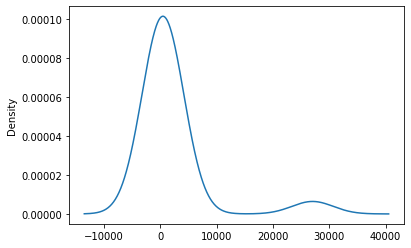

In [12]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [13]:
# Determine which values to replace if counts are less than 
replace_application = list(application_counts[application_counts < 100].index)
replace_application 

['T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [14]:
# Replace in dataframe
for app in replace_application:
  application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app, "Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [15]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts.head(50)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
C2190        1
C4200        1
C2600        1
C5200        1
C1370        1
Name: CLASSIFICATION, dtype: int64

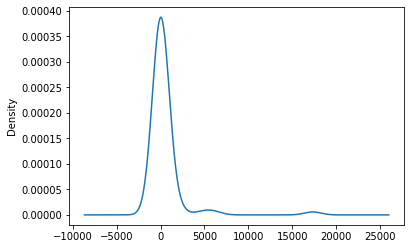

In [16]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [17]:
# Determine which values to replace if counts are less than 
replace_classification = list(classification_counts[classification_counts < 100].index)

In [18]:
# Replace in dataframe
for cl in replace_classification:
  application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cl, "Other")
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [19]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [20]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse = False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_HONOR SOCIETY OF PHI KAPPA PHI,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_INTERNATIONAL ASSOCIATION OF SHEET METAL AIR RAIL & TRANSPORTATION,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()


<ipython-input-21-b31b361b4355>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df = application_df.drop(application_cat,1)


,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_HONOR SOCIETY OF PHI KAPPA PHI,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values

<ipython-input-22-2e6c4a2d6029>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = application_df.drop(['IS_SUCCESSFUL'],1).values


In [23]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [25]:
len(X_train_scaled[0])

78

### Deliverable 2: Compile, Train and Evaluate the Model

## Deleted noisy variables from features and created bir for "rare" categorical variables

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer_1 = 80
hidden_nodes_layer_2 = 30

# hidden_nodes_layer_4 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units = hidden_nodes_layer_1, input_dim = number_input_features, activation = 'relu')#activation = 'LeakyReLU'
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units = hidden_nodes_layer_2, activation = 'relu')#activation = 'LeakyReLU'
)


# Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation='sigmoid')
)

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                6320      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 8,781
Trainable params: 8,781
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("/content/drive/MyDrive/challenge_19/checkpoints2/",exist_ok=True)
checkpoint_path = "/content/drive/MyDrive/challenge_19/checkpoints2/weights.{epoch:02d}.hdf5"
# checkpoint_dir = os.path.dirname(checkpoint_path)

In [29]:
# Create a callback that saves the model's weights every 5 epochs

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 'epoch',
    period= 5)

fit_model = nn.fit(X_train, y_train, epochs = 100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 17072.1523 - accuracy: 0.5073
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 49254.1445 - accuracy: 0.4952
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 17441.5078 - accuracy: 0.5101
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 18984.3320 - accuracy: 0.4980
Epoch 5/100
794/804 [============================>.] - ETA: 0s - loss: 14428.1914 - accuracy: 0.4926
Epoch 5: saving model to /content/drive/MyDrive/challenge_19/checkpoints2/weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 14268.8984 - accuracy: 0.4925
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 13512.2988 - accuracy: 0.4918
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 13963.5156 - accuracy: 0.5079
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 16991.3535 

In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.8179 - accuracy: 0.7199 - 491ms/epoch - 2ms/step
Loss: 0.8178601264953613, Accuracy: 0.719883382320404


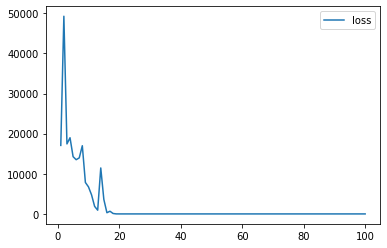

In [32]:
#Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history['loss'])+1))

#Plot the loss

history_df.plot(y='loss')

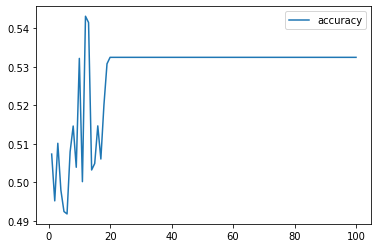

In [33]:
# Plot the accuracy
history_df.plot(y='accuracy')

In [34]:
# nn.save("/content/drive/MyDrive/challenge_19/Optimization_4.h5")